# RainMaker.jl challenge with SpeedyWeather.jl

The challenge:

> __Make it rain like crazy over the Azores!__

Rules
- Simulate global weather including precipitation (=rain) with [SpeedyWeather.jl](https://github.com/SpeedyWeather/SpeedyWeather.jl) over 20 days
- [Change "the World"](https://speedyweather.github.io/RainMaker.jl/dev/instructions/) in SpeedyWeather to maximise precipitation over the Azores ([38.7N, 27.25W](https://www.google.co.uk/maps/place/38%C2%B042'00.0%22N+27%C2%B015'00.0%22W/@38.7365518,-27.3343649,10.97z/data=!4m4!3m3!8m2!3d38.7!4d-27.25?hl=en&entry=ttu&g_ep=EgoyMDI0MTIxMS4wIKXMDSoASAFQAw%3D%3D))
- You can change boundary conditions ([mountains](https://speedyweather.github.io/RainMaker.jl/dev/instructions/#Change-the-orography), [sea surface temperature](https://speedyweather.github.io/RainMaker.jl/dev/instructions/#Change-the-surface-temperatures)) and initial conditions but not the laws of physis!
- Submit your simulation to [RainMaker.jl](https://github.com/SpeedyWeather/RainMaker.jl) via a [pull request](https://github.com/SpeedyWeather/RainMaker.jl/pulls)

Resources
- RainMaker [documentation](https://speedyweather.github.io/RainMaker.jl/dev/)
- RainMaker challenge [how to submit](https://speedyweather.github.io/RainMaker.jl/dev/submit/), [list of submission](https://speedyweather.github.io/RainMaker.jl/dev/submissions/) and [leaderboard](https://speedyweather.github.io/RainMaker.jl/dev/leaderboard/)

And in particular:
- Anas' [surrogate model](https://github.com/AIRCentre/JuliaEO25/tree/main/notebooks/day-5_2025-01-10) for ML-powered optimization!

## 1. How to run a SpeedyWeather simulation

### Load packages

In [3]:
using SpeedyWeather
using RainMaker        # defines the RainGauge to measure precipitation over the Azores!

### Define resolution

In [4]:
spectral_grid = SpectralGrid(trunc=31, nlayers=8)

SpectralGrid:
├ Spectral:   T31 LowerTriangularMatrix{Complex{Float32}}, radius = 6.371e6 m
├ Grid:       48-ring OctahedralGaussianGrid{Float32}, 3168 grid points
├ Resolution: 401km (average)
├ Vertical:   8-layer SigmaCoordinates
└ Device:     CPU using Array

### Create a model with all components default

In [5]:
model = PrimitiveWetModel(spectral_grid)

PrimitiveWetModel <: PrimitiveWet
├ spectral_grid: SpectralGrid
├ device_setup: SpeedyWeather.DeviceSetup{CPU, DataType}
├ dynamics: Bool
├ geometry: Geometry{Float32, OctahedralGaussianGrid}
├ planet: Earth{Float32}
├ atmosphere: EarthAtmosphere{Float32}
├ coriolis: Coriolis{Float32}
├ geopotential: Geopotential{Float32}
├ adiabatic_conversion: AdiabaticConversion{Float32}
├ particle_advection: NoParticleAdvection
├ initial_conditions: InitialConditions{ZonalWind, PressureOnOrography, JablonowskiTemperature, ConstantRelativeHumidity}
├ random_process: NoRandomProcess
├ orography: EarthOrography{Float32, OctahedralGaussianGrid{Float32}}
├ land_sea_mask: LandSeaMask{Float32, OctahedralGaussianGrid{Float32}}
├ ocean: SeasonalOceanClimatology{Float32, OctahedralGaussianGrid{Float32}}
├ land: SeasonalLandTemperature{Float32, OctahedralGaussianGrid{Float32}}
├ solar_zenith: SolarZenith{Float32}
├ albedo: AlbedoClimatology{Float32, OctahedralGaussianGrid{Float32}}
├ soil: SeasonalSoilMoistur

#### Add a rain gauge on the Azores

In [6]:
rain_gauge = RainGauge(spectral_grid, lond=-27.25, latd=38.7)
add!(model, rain_gauge)    # add to model.callbacks
rain_gauge

[ Info: RainGauge{Float32, AnvilInterpolator{Float32, OctahedralGaussianGrid}} callback added with key callback_EZrB


RainGauge{Float32, AnvilInterpolator{Float32, OctahedralGaussianGrid}} <: AbstractCallback
├ latd::Float64 = 38.7˚N
├ lond::Float64 = -27.25˚E
├ measurement_counter:Int = 0 (uninitialized)
├ tstart::DateTime = 2000-01-01T00:00:00
├ Δt::Second 1800 seconds
├ max_measurements::Int = 100000 (measuring for up to ~5.7 years, 0% recorded)
├ accumulated_rain_large_scale::Vector{Float32}, maximum: 0.0 mm
├ accumulated_rain_convection::Vector{Float32}, maximum: 0.0 mm
└ accumulated total precipitation: 0.000 mm

#### Initialize model to allocate a simulation

In [7]:
simulation = initialize!(model)

Simulation{PrimitiveWetModel}
├ prognostic_variables::PrognosticVariables{...}
├ diagnostic_variables::DiagnosticVariables{...}
└ model::PrimitiveWetModel{...}

#### Run simulation for 20 days!

In [8]:
run!(simulation, period=Day(20))

Weather is speedy: 100%|██████████████████| Time: 0:00:06 (700.94 years/day)


                      Surface relative vorticity [1/s]                     
       ┌────────────────────────────────────────────────────────────┐ 5e⁻⁵ 
    90 │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ ┌──┐ 
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│ 
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│ 
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│ 
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│ 
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│ 
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│ 
    ˚N │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│ 
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│ 
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│ 
       │▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄│ │▄▄│ 
       │▄▄▄▄

## 2. Visualise the precipitation

Skip first 5 days as is done in the RainMaker challenge!

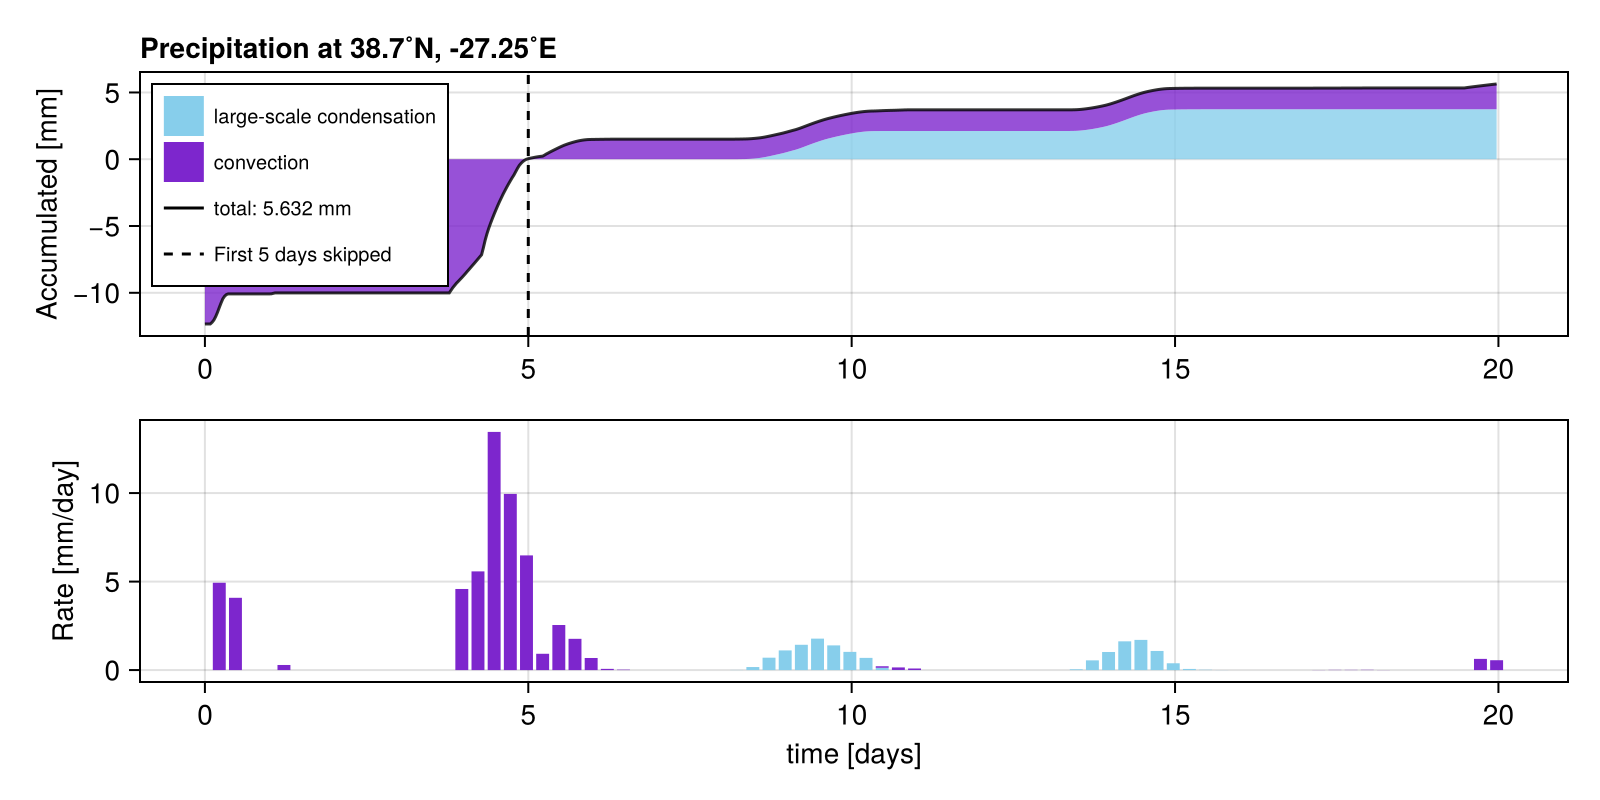

In [9]:
using CairoMakie
RainMaker.plot(rain_gauge, skip=Day(5))

Only 5.6mm on the Azores in the default SpeedyWeather model, can we make it rain more?

### Visualise a map of total accumulated precipitation

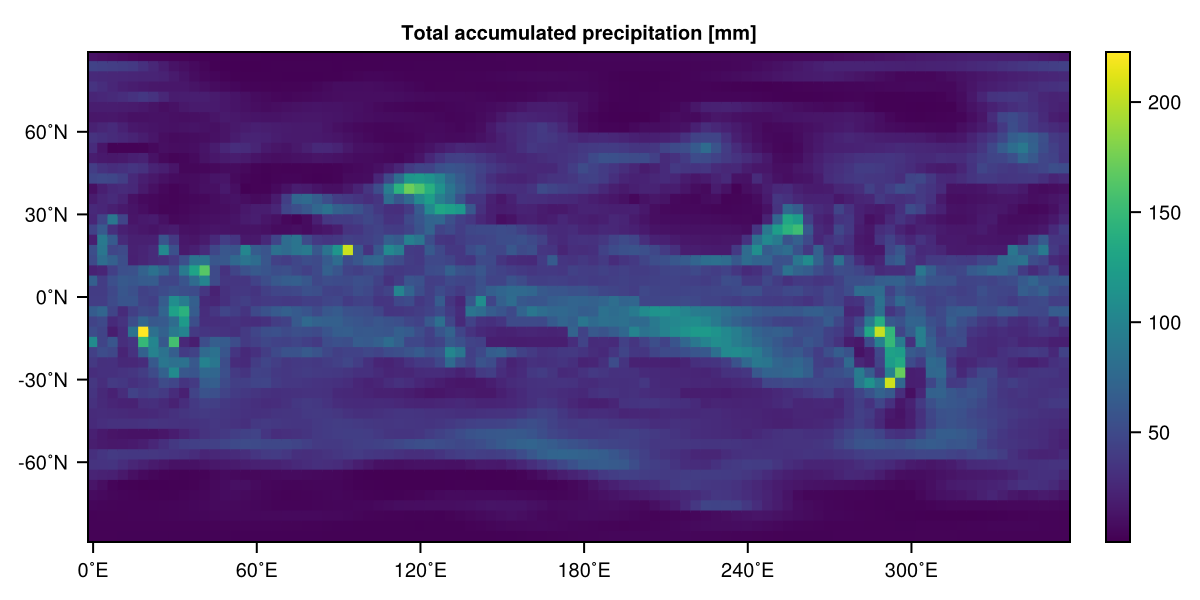

In [10]:
(; precip_convection, precip_large_scale) = simulation.diagnostic_variables.physics
total_precip = precip_convection + precip_large_scale
m2mm = 1000    # convert from m (SI unit) to mm (typical for rainfall)
total_precip *= m2mm

heatmap(total_precip, title="Total accumulated precipitation [mm]")

It rains in other parts of the world much more, so definitely large potential for optimization!

## 2. Make the Azores bigger!!

Manually set model orography _after_ initialization to prevent an re-initialization to defaults!

In [11]:
model = PrimitiveWetModel(spectral_grid)
rain_gauge2 = RainGauge(spectral_grid, lond=-27.25, latd=38.7)
add!(model, rain_gauge2)
simulation = initialize!(model)

[ Info: RainGauge{Float32, AnvilInterpolator{Float32, OctahedralGaussianGrid}} callback added with key callback_ye80


Simulation{PrimitiveWetModel}
├ prognostic_variables::PrognosticVariables{...}
├ diagnostic_variables::DiagnosticVariables{...}
└ model::PrimitiveWetModel{...}

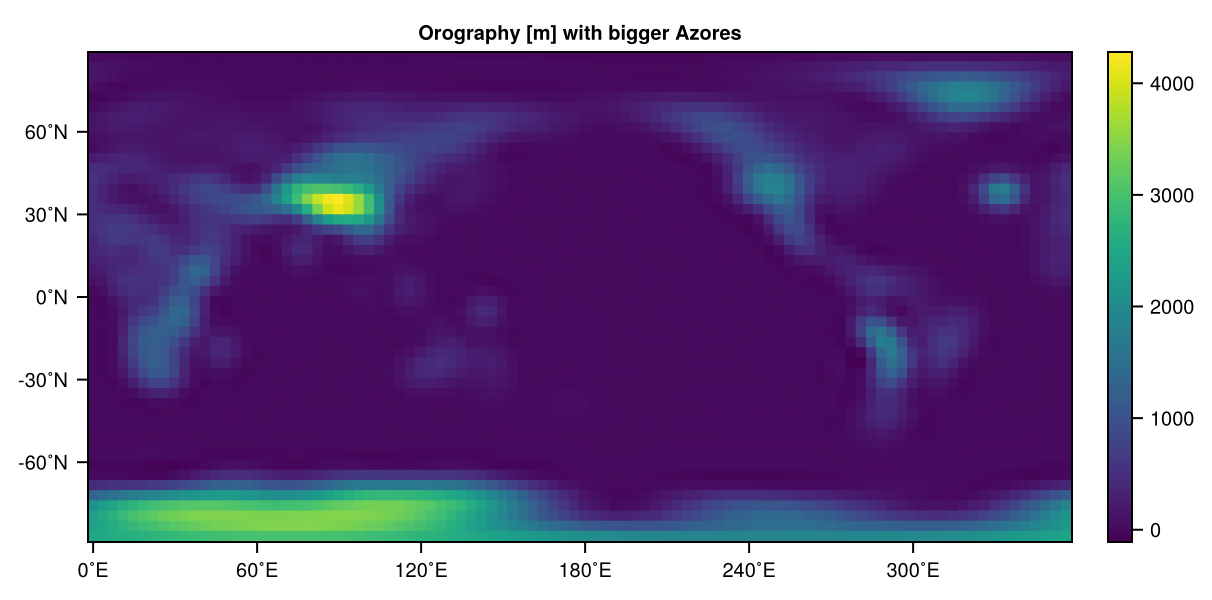

In [12]:
H = 2000           # height [m]
λ_azores = -27.25  # longitude [˚E]
φ_azores = 37.8    # latitude [˚N] 
σ = 4              # size [˚]

# define bigger azores as anonymous function, Gaussian mountain, use radius=360/2π for distance in [˚]
bigger_azores = (λ, φ) -> H*exp(-spherical_distance((λ, φ), (λ_azores, φ_azores), radius=360/2π)^2/2σ^2)

# add to default orography, don't replace
set!(model, orography=bigger_azores, add=true)

# visualise
heatmap(model.orography.orography, title="Orography [m] with bigger Azores")

### New rain gauge and reinitialize

Weather is speedy: 100%|██████████████████| Time: 0:00:05 (845.25 years/day)


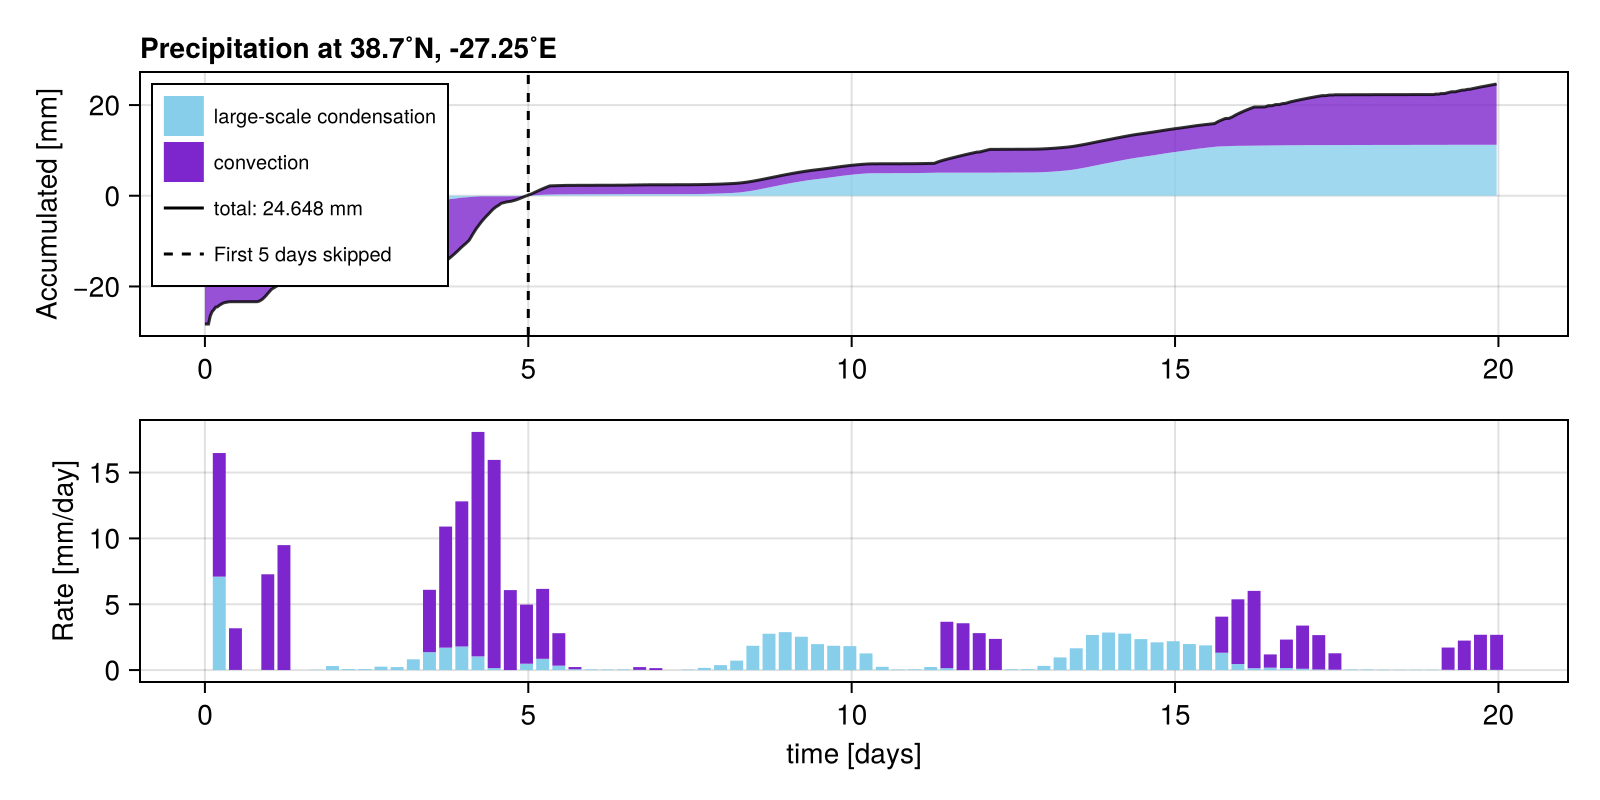

In [13]:
run!(simulation, period=Day(20))
RainMaker.plot(rain_gauge2, skip=Day(5))

Now the previous 5.6mm increased to almost 25mm! Can you make it rain even more?